In [15]:
import torch
from torchvision.ops import batched_nms

# Simulated input data
boxes = torch.tensor([[50, 40, 100, 100], [60, 50, 120, 120], [70, 60, 140, 140], [80, 70, 160, 160]], dtype=torch.float32)
scores = torch.tensor([0.9, 0.8, 0.7, 0.6], dtype=torch.float32)

# Apply Non-Maximum Suppression (NMS)
keep_indices = batched_nms(boxes, scores, torch.arange(len(boxes)), iou_threshold=0.5)

# Print the indices of the selected boxes after NMS
print(keep_indices)

okay
offsets:  tensor([  0., 161., 322., 483.])
boxes after:  tensor([[ 50.,  40., 100., 100.],
        [221., 211., 281., 281.],
        [392., 382., 462., 462.],
        [563., 553., 643., 643.]])
tensor([0, 1, 2, 3])


In [17]:
import numpy as np

confs =  np.array([0.1, 0.14, 0.18, 0.2])

-1 * confs + 0.25

array([0.15, 0.11, 0.07, 0.05])

In [3]:
torch.arange(len(boxes))

tensor([0, 1, 2, 3])

In [7]:
torch.ops.torchvision.nms(boxes, scores, iou_threshold=0.5)

tensor([0, 1, 2, 3])

okay
offsets:  tensor([161., 161., 161., 161.])
boxes after:  tensor([[211., 201., 261., 261.],
        [221., 211., 281., 281.],
        [231., 221., 301., 301.],
        [241., 231., 321., 321.]])
tensor([0, 1, 2, 3])
tensor([[ 50.,  40., 100., 100.],
        [ 60.,  50., 120., 120.],
        [ 70.,  60., 140., 140.],
        [ 80.,  70., 160., 160.]])


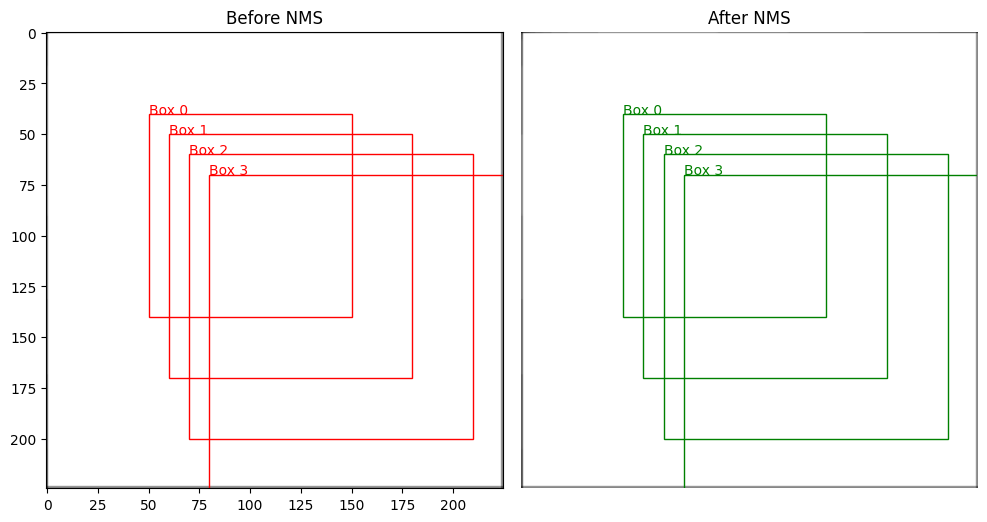

In [5]:
import torch
import matplotlib.pyplot as plt
from torchvision.ops import batched_nms

# Simulated input data
boxes = torch.tensor([[50, 40, 100, 100], [60, 50, 120, 120], [70, 60, 140, 140], [80, 70, 160, 160]], dtype=torch.float32)
scores = torch.tensor([0.9, 0.8, 0.7, 0.6], dtype=torch.float32)

# Visualize the bounding boxes before NMS
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(plt.imread("image.jpg"))
ax[0].set_title("Before NMS")

# Plot the original bounding boxes
for i, box in enumerate(boxes):
    x, y, w, h = box.tolist()
    rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red')
    ax[0].add_patch(rect)
    ax[0].text(x, y, f"Box {i}", color='red')

# Apply Non-Maximum Suppression (NMS)
keep_indices = batched_nms(boxes, scores, torch.tensor([1,1,1,1]), iou_threshold=0.5)
print(keep_indices)

# Filter out the boxes that are removed after NMS
filtered_boxes = boxes[keep_indices]
filtered_scores = scores[keep_indices]

# Visualize the bounding boxes after NMS
ax[1].imshow(plt.imread("image.jpg"))
ax[1].set_title("After NMS")

print(filtered_boxes)

# Plot the selected boxes after NMS
for idx in range(len(filtered_boxes)):
    box = filtered_boxes[idx].tolist()
    x, y, w, h = box
    rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='green')
    ax[1].add_patch(rect)
    ax[1].text(x, y, f"Box {idx}", color='green')

# Display the plots
plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
import torch
from torchvision import transforms
from PIL import Image
import random

random_scale = random.uniform(0.5, 2)

# Load the image using PIL
image_path = "/Users/coenschoof/miniconda/envs/phantomsponges/BDD100K-to-YOLOV5/bdd_in_YOLOV5_train_newLabels/images/val/b1ca2e5d-84cf9134.jpg" 
image = Image.open(image_path)
original_img_size = image.size
image = image.resize((640, 640))

# Define transformations to convert the image to a torch tensor
transform = transforms.Compose([transforms.ToTensor()])

buses = transform(image)

# Load the image using PIL
image_path = "/Users/coenschoof/miniconda/envs/phantomsponges/PhantomSponges/final_patch.png" 
image = Image.open(image_path)
perturbation = transform(image)

#print(perturbation.size())

result = torch.clamp(buses + perturbation, 0, 1)

# Assuming you have a torch tensor named torch_image
# You can resize the tensor to (H, W, C) shape using transpose and multiply by 255 (if it's not already in the correct range)
#pil_image = transforms.ToPILImage()(result.squeeze().cpu() * 255)
tensor_min = torch.min(result)
tensor_max = torch.max(result)
normalized_tensor = (result - tensor_min) / (tensor_max - tensor_min)

# Convert the normalized tensor to a PIL image
pil_image = transforms.ToPILImage()(normalized_tensor.squeeze().cpu())
width = int(original_img_size[0] * random_scale)
height = int(original_img_size[1] * random_scale)
print(width, height)
image = image.resize(width, height)

# Save the PIL image
image_path = "/Users/coenschoof/miniconda/envs/phantomsponges/PhantomSponges/perturbed_image_2_randomResize.jpg"
pil_image.save(image_path)

(1280, 720) 1.1138950002651986


ValueError: Unknown resampling filter (802.004400190943). Use Image.NEAREST (0), Image.LANCZOS (1), Image.BILINEAR (2), Image.BICUBIC (3), Image.BOX (4) or Image.HAMMING (5)